In [1]:
import os

import analysis_plotting_helper_functions_c3v3 as helper
import session_processing_helper_c5 as processing_helper
import analysis_utils as utils
import utils_c5v2

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
data_dir = '/Users/rebekahzhang/data/behavior_data'
exp = "exp2"
cohort = "c567"
data_folder = os.path.join(data_dir, exp, cohort)
figure_folder = os.path.join(data_dir, exp, f'{cohort}_figures')
print(data_folder)
print(figure_folder)

/Users/rebekahzhang/data/behavior_data/exp2/c567
/Users/rebekahzhang/data/behavior_data/exp2/c567_figures


In [3]:
# two_colors = plt.cm.viridis(np.linspace(0, 1, 2))
two_colors = ["#ffb400", "#9080ff"]
custom_palette = {'s': two_colors[0], 'l': two_colors[1]}

# Merge session logs of different cohorts
merging two logs and adding training session number, then saving. remember to move data from cohort folders to combined folder. Does not need to be re run

In [4]:
sessions_c5 = pd.read_csv(os.path.join(data_dir, exp, 'cohort_5', 'sessions_training.csv'))
sessions_c5['cohort'] = 'cohort_5'
sessions_c6 = pd.read_csv(os.path.join(data_dir, exp, 'cohort_6', 'sessions_training.csv'))
sessions_c6['cohort'] = 'cohort_6'
sessions_c7 = pd.read_csv(os.path.join(data_dir, exp, 'cohort_7', 'sessions_training.csv'))
sessions_c7['cohort'] = 'cohort_7'

In [5]:
sessions_c567 = pd.concat([sessions_c5, sessions_c6, sessions_c7])

In [6]:
sessions_c567 = sessions_c567.drop(columns = ['Unnamed: 0'])
sessions_c567 = sessions_c567.groupby('mouse', group_keys=False).apply(processing_helper.assign_session_numbers)
sessions_c567 = sessions_c567.sort_values('dir')

In [7]:
sessions_c567

,mouse,date,time,exp,training,rig,pump_ul_per_turn,avg_tw,dir,group,session,num_blocks,num_trials,rewards,session_time,trainer,record,ending_code,cohort
0,RZ034,2024-01-30,09-52-34,2,regular,rig2,0.0680,0.47,2024-01-30_09-52-34_RZ034,s,0,1.0,397.0,210.0,2406.21,NaN,NaN,NaN,cohort_5
1,RZ036,2024-01-30,09-55-23,2,regular,rig3,0.0609,0.39,2024-01-30_09-55-23_RZ036,s,0,1.0,664.0,425.0,3601.08,NaN,NaN,NaN,cohort_5
2,RZ037,2024-01-30,10-36-04,2,regular,rig2,0.0680,1.70,2024-01-30_10-36-04_RZ037,l,0,1.0,252.0,370.0,3602.47,NaN,NaN,NaN,cohort_5
3,RZ038,2024-01-30,10-59-43,2,regular,rig3,0.0609,0.75,2024-01-30_10-59-43_RZ038,l,0,1.0,239.0,170.0,3607.86,NaN,NaN,NaN,cohort_5
4,RZ039,2024-01-30,11-40-20,2,regular,rig2,0.0680,1.18,2024-01-30_11-40-20_RZ039,l,0,1.0,245.0,275.0,3610.04,NaN,NaN,NaN,cohort_5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,RZ059,2025-03-17,13-13-38,2,regular,rig1,NaN,8.47,2025-03-17_13-13-38_RZ059,l,50,1.0,284.0,875.0,4622.56,Rebekah,True,miss,cohort_7
551,RZ059,2025-03-18,11-12-43,2,regular,rig1,NaN,2.55,2025-03-18_11-12-43_RZ059,l,51,1.0,434.0,900.0,5031.07,Rebekah,True,reward,cohort_7
552,RZ059,2025-03-19,12-19-18,2,regular,rig1,NaN,5.41,2025-03-19_12-19-18_RZ059,l,52,1.0,272.0,900.0,3782.92,Rebekah,True,reward,cohort_7
553,RZ059,2025-03-20,13-48-44,2,regular,rig1,NaN,5.55,2025-03-20_13-48-44_RZ059,l,53,1.0,316.0,900.0,4442.58,Rebekah,True,reward,cohort_7


In [8]:
utils_c5v2.save_as_csv(df=sessions_c567, folder=data_folder, filename='sessions_training.csv')

# Stats to figure out dataset
mega hack. i am not proud

In [9]:
sessions_training = pd.read_csv(os.path.join(data_folder, 'sessions_training.csv'))

In [10]:
sessions_by_mouse = sessions_training.groupby('mouse')
days_trained_list = []
for m, mouse_data in sessions_by_mouse:
    days_trained = mouse_data.session.max()
    days_trained_list.append({'mouse': m, 'days_trained': days_trained})
days_trained_df = pd.DataFrame(days_trained_list).sort_values(by=['days_trained'])

In [11]:
days_trained_df.sort_values("mouse")

,mouse,days_trained
0,RZ034,98
1,RZ036,100
2,RZ037,96
3,RZ038,95
4,RZ039,94
5,RZ047,88
6,RZ048,6
7,RZ049,78
8,RZ050,93
9,RZ051,92


In [12]:
early_termination = days_trained_df.loc[days_trained_df.days_trained < 10]
early_termination_mouse_list = early_termination.mouse.tolist()

In [13]:
sessions_training = pd.read_csv(os.path.join(data_folder, 'sessions_training.csv'))
# get rid of mice that died early
sessions_training = sessions_training.loc[~sessions_training['mouse'].isin(early_termination_mouse_list)]

In [14]:
sorted_mouse_list = sorted(sessions_training.mouse.unique())
print(sorted_mouse_list)

['RZ034', 'RZ036', 'RZ037', 'RZ038', 'RZ039', 'RZ047', 'RZ049', 'RZ050', 'RZ051', 'RZ052', 'RZ053', 'RZ054', 'RZ055', 'RZ056', 'RZ057', 'RZ058', 'RZ059', 'RZ061', 'RZ062', 'RZ063', 'RZ064', 'RZ065', 'RZ067', 'RZ068', 'RZ069', 'RZ070', 'RZ072']


In [15]:
# only doing it for the first 57 days because the second cohort has only 57 days
sessions_training = sessions_training.loc[sessions_training['session'] <= 80]

In [16]:
def generate_wait_df(training_session_log):
    wait_df = training_session_log[['mouse', 'session', 'dir', 'group']].copy()

    for _, session_info in training_session_log.iterrows():
        all_trials = utils_c5v2.load_data(utils_c5v2.generate_trials_analyzed_path(data_folder, session_info))
        # time waited for all trials
        session_tw = helper.get_session_tw(all_trials)
        wait_df.loc[wait_df.dir == session_info['dir'], 
                                ['tw_mean', 'tw_median', 'tw_stdev']] = session_tw

        good_trials = utils.select_good_trials(all_trials)
         # time waited for good trials
        session_tw_g = helper.get_session_tw(good_trials)
        wait_df.loc[wait_df.dir == session_info['dir'], 
                                ['tw_mean_g', 'tw_median_g', 'tw_stdev_g']] = session_tw_g
    return wait_df

In [17]:
wait_df = generate_wait_df(sessions_training)

In [18]:
def generate_mouse_wait_df(wait_df):
    data_list = []
    wait_df_by_mouse = wait_df.groupby('mouse')
    for m, mouse_data in wait_df_by_mouse:
        avg_avg_tw = mouse_data['tw_mean'].mean()
        data = {"mouse": m, 'tw': avg_avg_tw, 'group':mouse_data.group.tolist()[0]}
        data_list.append(data)
    mouse_wait_df = pd.DataFrame(data_list).sort_values(by=['group','tw'])
    return mouse_wait_df

In [19]:
mouse_wait_df = generate_mouse_wait_df(wait_df)
display(mouse_wait_df)

,mouse,tw,group
13,RZ056,2.482505,l
9,RZ052,2.897531,l
2,RZ037,3.199218,l
21,RZ065,3.384648,l
10,RZ053,3.549495,l
22,RZ067,3.628570,l
14,RZ057,3.716983,l
23,RZ068,3.964473,l
15,RZ058,4.725533,l
16,RZ059,4.973462,l


### zscore to find outlier sessions

In [20]:
def calculate_tw_z_score(mouse_data):
    time_waited = mouse_data['tw_mean']
    z_score = stats.zscore(time_waited)
    mouse_data['tw_z_score'] = z_score
    return mouse_data

In [21]:
wait_df = wait_df.groupby('mouse', group_keys=False).apply(calculate_tw_z_score)
outlier_sessions = wait_df[(wait_df['tw_z_score'] > 3) | (wait_df['tw_z_score'] < -3)].sort_values("mouse")
wait_df_no_outlier = wait_df[wait_df['tw_z_score'].between(-3, 3)]

In [22]:
print(len(outlier_sessions))
outlier_sessions

24


,mouse,session,dir,group,tw_mean,tw_median,tw_stdev,tw_mean_g,tw_median_g,tw_stdev_g,tw_z_score
239,RZ034,47,2024-04-02_11-03-45_RZ034,s,4.388683,3.089087,4.323329,5.582193,4.926318,4.369906,3.049357
320,RZ034,64,2024-05-14_10-52-36_RZ034,s,4.829669,3.714204,4.625706,4.635715,3.382386,4.738490,3.569884
161,RZ036,32,2024-03-12_10-31-04_RZ036,s,7.717843,6.922772,6.313204,8.232715,7.098698,6.496484,4.934008
127,RZ037,25,2024-03-01_11-15-25_RZ037,l,11.590128,6.621077,11.946763,13.076591,8.186497,12.267641,3.649893
709,RZ047,24,2024-07-25_10-22-33_RZ047,s,9.692251,5.159410,10.615050,9.938775,5.311525,10.725057,5.589440
729,RZ050,26,2024-07-29_11-10-36_RZ050,s,14.641873,11.341994,14.449534,15.870574,12.799060,14.310668,6.490586
712,RZ051,24,2024-07-25_11-49-37_RZ051,s,7.895066,5.323081,9.800069,8.248046,5.450204,10.226429,3.371303
730,RZ051,26,2024-07-29_11-13-29_RZ051,s,8.661006,4.641406,10.958738,9.337170,4.953350,11.684251,3.851819
738,RZ051,27,2024-07-30_11-20-16_RZ051,s,10.219872,6.738167,10.740467,10.645358,7.048904,11.056479,4.829779
640,RZ052,18,2024-07-15_11-13-16_RZ052,l,9.591468,2.625030,14.426257,12.701486,5.050126,16.006931,4.469547


In [23]:
mouse_wait_df = generate_mouse_wait_df(wait_df_no_outlier)
display(mouse_wait_df)

,mouse,tw,group
13,RZ056,2.363165,l
9,RZ052,2.812797,l
2,RZ037,3.094332,l
10,RZ053,3.368476,l
21,RZ065,3.384648,l
22,RZ067,3.466902,l
14,RZ057,3.535379,l
23,RZ068,3.770393,l
15,RZ058,4.510526,l
16,RZ059,4.973462,l


In [24]:
sessions_training

,Unnamed: 0,mouse,date,time,exp,training,rig,pump_ul_per_turn,avg_tw,dir,group,session,num_blocks,num_trials,rewards,session_time,trainer,record,ending_code,cohort
0,0,RZ034,2024-01-30,09-52-34,2,regular,rig2,0.0680,0.47,2024-01-30_09-52-34_RZ034,s,0,1.0,397.0,210.0,2406.21,NaN,NaN,NaN,cohort_5
1,1,RZ036,2024-01-30,09-55-23,2,regular,rig3,0.0609,0.39,2024-01-30_09-55-23_RZ036,s,0,1.0,664.0,425.0,3601.08,NaN,NaN,NaN,cohort_5
2,2,RZ037,2024-01-30,10-36-04,2,regular,rig2,0.0680,1.70,2024-01-30_10-36-04_RZ037,l,0,1.0,252.0,370.0,3602.47,NaN,NaN,NaN,cohort_5
3,3,RZ038,2024-01-30,10-59-43,2,regular,rig3,0.0609,0.75,2024-01-30_10-59-43_RZ038,l,0,1.0,239.0,170.0,3607.86,NaN,NaN,NaN,cohort_5
4,4,RZ039,2024-01-30,11-40-20,2,regular,rig2,0.0680,1.18,2024-01-30_11-40-20_RZ039,l,0,1.0,245.0,275.0,3610.04,NaN,NaN,NaN,cohort_5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1801,550,RZ059,2025-03-17,13-13-38,2,regular,rig1,NaN,8.47,2025-03-17_13-13-38_RZ059,l,50,1.0,284.0,875.0,4622.56,Rebekah,True,miss,cohort_7
1802,551,RZ059,2025-03-18,11-12-43,2,regular,rig1,NaN,2.55,2025-03-18_11-12-43_RZ059,l,51,1.0,434.0,900.0,5031.07,Rebekah,True,reward,cohort_7
1803,552,RZ059,2025-03-19,12-19-18,2,regular,rig1,NaN,5.41,2025-03-19_12-19-18_RZ059,l,52,1.0,272.0,900.0,3782.92,Rebekah,True,reward,cohort_7
1804,553,RZ059,2025-03-20,13-48-44,2,regular,rig1,NaN,5.55,2025-03-20_13-48-44_RZ059,l,53,1.0,316.0,900.0,4442.58,Rebekah,True,reward,cohort_7


In [25]:
wait_df_no_outlier_to_merge = wait_df_no_outlier[['dir', 'tw_mean']]
sessions_training = pd.merge(sessions_training, wait_df_no_outlier_to_merge, on='dir')
sessions_training = sessions_training.drop(columns = ['Unnamed: 0'])

In [26]:
utils_c5v2.save_as_csv(df=sessions_training, folder=data_folder, filename='sessions_training_no_outliers.csv')

### Within group anova to find outlier mouse

In [27]:
sessions_training = pd.read_csv(os.path.join(data_folder, 'sessions_training_no_outliers.csv'))

In [28]:
short = sessions_training[sessions_training['group']=='s']
long = sessions_training[sessions_training['group']=='l']

In [29]:
short_by_mouse = short.groupby('mouse')
mouse_names = short.mouse.unique().tolist()

# Extract 'tw_mean' values for each mouse and store them in a list of lists
tw_mean_values = [short_by_mouse.get_group(m)['tw_mean'].tolist() for m in mouse_names]

# Perform the ANOVA test using the list of lists
f_stat, p_value = stats.f_oneway(*tw_mean_values)

print("F-stats:", f_stat)
print("P-value:", p_value)

tukey_results = pairwise_tukeyhsd(short['tw_mean'], short['mouse'])
print(tukey_results)

F-stats: 65.53971661944522
P-value: 2.4719876994666067e-107
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 RZ034  RZ036   0.3057 0.9946  -0.565  1.1764  False
 RZ034  RZ047   0.5317  0.713 -0.3391  1.4024  False
 RZ034  RZ049   5.8506    0.0  4.9772  6.7241   True
 RZ034  RZ050   0.5731 0.6007 -0.2977  1.4438  False
 RZ034  RZ051   0.5406 0.6987 -0.3357  1.4169  False
 RZ034  RZ061   1.7064    0.0  0.7261  2.6867   True
 RZ034  RZ062  -0.1248    1.0 -1.1361  0.8864  False
 RZ034  RZ063   1.0532   0.03  0.0486  2.0579   True
 RZ034  RZ064  -0.0205    1.0 -1.3211  1.2802  False
 RZ034  RZ069   1.8289    0.0   0.691  2.9667   True
 RZ034  RZ070   0.5705 0.8803 -0.5231  1.6641  False
 RZ034  RZ072   1.2269 0.0423  0.0196  2.4343   True
 RZ036  RZ047    0.226 0.9997  -0.642   1.094  False
 RZ036  RZ049   5.5449    0.0  4.6742  6.4157   True
 RZ036  RZ050   0.2674 0.9984 -0.6006  

In [30]:
# get rid of outlier mouse based on tuckey test restults
# no 49 or 69
short = short[~short['mouse'].isin(['RZ049', 'RZ069'])] 
short_by_mouse = short.groupby('mouse')
mouse_names = short.mouse.unique().tolist()

# Extract 'tw_mean' values for each mouse and store them in a list of lists
tw_mean_values = [short_by_mouse.get_group(m)['tw_mean'].tolist() for m in mouse_names]

# Perform the ANOVA test using the list of lists
f_stat, p_value = stats.f_oneway(*tw_mean_values)

print("F-stats:", f_stat)
print("P-value:", p_value)

tukey_results = pairwise_tukeyhsd(short['tw_mean'], short['mouse'])
print(tukey_results)

F-stats: 11.196672221757362
P-value: 1.0368655444745155e-17
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 RZ034  RZ036   0.3057 0.8583 -0.2917  0.9031  False
 RZ034  RZ047   0.5317 0.1333 -0.0657   1.129  False
 RZ034  RZ050   0.5731 0.0734 -0.0243  1.1704  False
 RZ034  RZ051   0.5406 0.1236 -0.0606  1.1418  False
 RZ034  RZ061   1.7064    0.0  1.0339  2.3789   True
 RZ034  RZ062  -0.1248    1.0 -0.8186  0.5689  False
 RZ034  RZ063   1.0532 0.0001   0.364  1.7425   True
 RZ034  RZ064  -0.0205    1.0 -0.9128  0.8719  False
 RZ034  RZ070   0.5705 0.3326 -0.1798  1.3207  False
 RZ034  RZ072   1.2269 0.0001  0.3986  2.0553   True
 RZ036  RZ047    0.226 0.9794 -0.3695  0.8215  False
 RZ036  RZ050   0.2674 0.9349 -0.3281  0.8628  False
 RZ036  RZ051   0.2349  0.974 -0.3644  0.8342  False
 RZ036  RZ061   1.4007    0.0  0.7298  2.0716   True
 RZ036  RZ062  -0.4305 0.6423 -1.1227  

In [31]:
long_by_mouse = long.groupby('mouse')
mouse_names = long.mouse.unique().tolist()

# Extract 'tw_mean' values for each mouse and store them in a list of lists
tw_mean_values = [long_by_mouse.get_group(m)['tw_mean'].tolist() for m in mouse_names]

# Perform the ANOVA test using the list of lists
f_stat, p_value = stats.f_oneway(*tw_mean_values)

print("F-stats:", f_stat)
print("P-value:", p_value)

tukey_results = pairwise_tukeyhsd(long['tw_mean'], long['mouse'])
print(tukey_results)

F-stats: 17.02048807319978
P-value: 2.3529207887262485e-35
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 RZ037  RZ038    3.705    0.0   2.361   5.049   True
 RZ037  RZ039   2.0721    0.0  0.7281  3.4162   True
 RZ037  RZ052  -0.2815    1.0  -1.634  1.0709  False
 RZ037  RZ053   0.2741    1.0 -1.0741  1.6223  False
 RZ037  RZ054   2.0858    0.0    0.72  3.4516   True
 RZ037  RZ055   1.9317 0.0002  0.5748  3.2885   True
 RZ037  RZ056  -0.7312 0.8786 -2.1016  0.6393  False
 RZ037  RZ057    0.441 0.9994 -1.0691  1.9512  False
 RZ037  RZ058   1.4162 0.0975 -0.1027  2.9351  False
 RZ037  RZ059   1.8791 0.0021  0.3856  3.3727   True
 RZ037  RZ065   0.2903    1.0 -1.3345  1.9151  False
 RZ037  RZ067   0.3726    1.0 -1.3227  2.0678  False
 RZ037  RZ068   0.6761 0.9876 -1.0192  2.3713  False
 RZ038  RZ039  -1.6329 0.0036 -2.9727  -0.293   True
 RZ038  RZ052  -3.9865    0.0 -5.3349 -2

In [32]:
long = long[~long['mouse'].isin(['RZ056', 'RZ052'])] 
long_by_mouse = long.groupby('mouse')
mouse_names = long.mouse.unique().tolist()

# Extract 'tw_mean' values for each mouse and store them in a list of lists
tw_mean_values = [long_by_mouse.get_group(m)['tw_mean'].tolist() for m in mouse_names]

# Perform the ANOVA test using the list of lists
f_stat, p_value = stats.f_oneway(*tw_mean_values)

print("F-stats:", f_stat)
print("P-value:", p_value)

tukey_results = pairwise_tukeyhsd(long['tw_mean'], long['mouse'])
print(tukey_results)

F-stats: 11.558481652988004
P-value: 4.5059868905756865e-20
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 RZ037  RZ038    3.705    0.0  2.2891   5.121   True
 RZ037  RZ039   2.0721 0.0001  0.6562  3.4881   True
 RZ037  RZ053   0.2741    1.0 -1.1462  1.6945  False
 RZ037  RZ054   2.0858 0.0002  0.6469  3.5247   True
 RZ037  RZ055   1.9317 0.0007  0.5022  3.3611   True
 RZ037  RZ057    0.441  0.999 -1.1499   2.032  False
 RZ037  RZ058   1.4162 0.1424  -0.184  3.0164  False
 RZ037  RZ059   1.8791 0.0055  0.3056  3.4526   True
 RZ037  RZ065   0.2903    1.0 -1.4214   2.002  False
 RZ037  RZ067   0.3726 0.9999 -1.4134  2.1585  False
 RZ037  RZ068   0.6761 0.9855 -1.1099   2.462  False
 RZ038  RZ039  -1.6329 0.0088 -3.0444 -0.2213   True
 RZ038  RZ053  -3.4309    0.0 -4.8468 -2.0149   True
 RZ038  RZ054  -1.6192 0.0123 -3.0538 -0.1846   True
 RZ038  RZ055  -1.7734 0.0029 -3.1984 -

### getting rid of outlier sessions and outlier mice

from the results. 
I'm taking out only 049

In [33]:
sessions_training = pd.read_csv(os.path.join(data_folder, 'sessions_training_no_outliers.csv'))

In [34]:
# sessions_training = sessions_training.loc[~sessions_training['mouse'].isin(['RZ049', 'RZ069', 'RZ056', 'RZ052'])]

In [35]:
sessions_training = sessions_training.loc[~sessions_training['mouse'].isin(['RZ049'])]

### between group t-test

In [36]:
# differences with raw data
short = sessions_training[sessions_training['group']=='s']
long = sessions_training[sessions_training['group']=='l']

print(f'{len(short.mouse.unique())+len(long.mouse.unique())} mice')
print(short.tw_mean.mean())
print(long.tw_mean.mean())
print("diff:", long.tw_mean.mean()-short.tw_mean.mean())

#perform independent two sample t-test
stats.ttest_ind(short['tw_mean'], long['tw_mean'])

26 mice
2.3414784499276564
4.168674823655279
diff: 1.827196373727623


Ttest_indResult(statistic=-15.469344625360941, pvalue=2.3923087772361564e-50)

In [37]:
len(sessions_training)

1571

In [38]:
sessions_training.num_trials.sum()

563946.0

In [39]:
sessions_training = sessions_training.groupby('mouse', group_keys=False).apply(processing_helper.assign_session_numbers)

In [40]:
utils_c5v2.save_as_csv(df=sessions_training, folder=data_folder, filename='sessions_training_vetted.csv')

# Session based plotting

In [41]:
# there is an annoying unamed:0 colomn and i want to get rid of it
sessions_training = pd.read_csv(os.path.join(data_folder, 'sessions_training_vetted.csv'))

In [42]:
sessions_training

,Unnamed: 0.1,Unnamed: 0,mouse,date,time,exp,training,rig,pump_ul_per_turn,avg_tw,...,session,num_blocks,num_trials,rewards,session_time,trainer,record,ending_code,cohort,tw_mean
0,0,0,RZ034,2024-01-30,09-52-34,2,regular,rig2,0.0680,0.47,...,0,1.0,397.0,210.0,2406.21,NaN,NaN,NaN,cohort_5,0.466963
1,1,1,RZ036,2024-01-30,09-55-23,2,regular,rig3,0.0609,0.39,...,0,1.0,664.0,425.0,3601.08,NaN,NaN,NaN,cohort_5,0.390074
2,2,2,RZ037,2024-01-30,10-36-04,2,regular,rig2,0.0680,1.70,...,0,1.0,252.0,370.0,3602.47,NaN,NaN,NaN,cohort_5,1.696422
3,3,3,RZ038,2024-01-30,10-59-43,2,regular,rig3,0.0609,0.75,...,0,1.0,239.0,170.0,3607.86,NaN,NaN,NaN,cohort_5,0.753882
4,4,4,RZ039,2024-01-30,11-40-20,2,regular,rig2,0.0680,1.18,...,0,1.0,245.0,275.0,3610.04,NaN,NaN,NaN,cohort_5,1.179677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1566,1645,1645,RZ059,2025-03-17,13-13-38,2,regular,rig1,NaN,8.47,...,50,1.0,284.0,875.0,4622.56,Rebekah,True,miss,cohort_7,7.006051
1567,1646,1646,RZ059,2025-03-18,11-12-43,2,regular,rig1,NaN,2.55,...,51,1.0,434.0,900.0,5031.07,Rebekah,True,reward,cohort_7,2.554362
1568,1647,1647,RZ059,2025-03-19,12-19-18,2,regular,rig1,NaN,5.41,...,52,1.0,272.0,900.0,3782.92,Rebekah,True,reward,cohort_7,5.204634
1569,1648,1648,RZ059,2025-03-20,13-48-44,2,regular,rig1,NaN,5.55,...,53,1.0,316.0,900.0,4442.58,Rebekah,True,reward,cohort_7,5.028114


### make mouse list

In [43]:
mouse_list = utils_c5v2.generate_mouse_list(sessions_training)
# mouse_list = ['RZ034', 'RZ036', 'RZ037', 'RZ038', 'RZ039', 'RZ047', 'RZ050', 'RZ051', 'RZ052', 'RZ053', 'RZ054', 'RZ055', 'RZ056']
print(mouse_list)

['RZ034', 'RZ036', 'RZ037', 'RZ038', 'RZ039', 'RZ047', 'RZ050', 'RZ051', 'RZ052', 'RZ053', 'RZ054', 'RZ055', 'RZ056', 'RZ057', 'RZ058', 'RZ059', 'RZ061', 'RZ062', 'RZ063', 'RZ064', 'RZ065', 'RZ067', 'RZ068', 'RZ069', 'RZ070', 'RZ072']


In [44]:
mouse_wait_df = generate_mouse_wait_df(sessions_training)
cohort_group = {}
for group, group_df in mouse_wait_df.groupby('group'):
    cohort_group[group] = group_df['mouse'].tolist()
print(cohort_group)

{'l': ['RZ056', 'RZ052', 'RZ037', 'RZ053', 'RZ065', 'RZ067', 'RZ057', 'RZ068', 'RZ058', 'RZ059', 'RZ055', 'RZ039', 'RZ054', 'RZ038'], 's': ['RZ062', 'RZ064', 'RZ034', 'RZ036', 'RZ047', 'RZ051', 'RZ070', 'RZ050', 'RZ063', 'RZ072', 'RZ061', 'RZ069']}


### Plotting functions
should be moved to helper

In [45]:
def plot_each_mouse_per_line(data_df, column_name, plot_name, title, x_label, y_label, 
                             figure_folder=figure_folder, mouse_list=mouse_list):
    fig = plt.figure()
    palette = sns.color_palette("Spectral", n_colors=len(mouse_list)) 
    for i, mouse in enumerate(mouse_list):
        session_mouse = data_df.loc[data_df.mouse == mouse]
        plt.plot(session_mouse.session, session_mouse[column_name], color=palette[i], label=mouse)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
    fig.savefig(f'{figure_folder}/{plot_name}.png', bbox_inches='tight')

In [46]:
def plot_overdays_colored_by_group(data_df, column_name, plot_name, title, x_label, y_label, 
                                   figure_folder=figure_folder, color_palette=custom_palette):
    fig = plt.figure()
    sns.lineplot(x="session",
                 y=column_name,
                 hue="group",
                 data=data_df,
                 palette=color_palette)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    # plt.ylim(1,4)
    plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
    fig.savefig(f'{figure_folder}/{plot_name}.png', bbox_inches='tight')

# Plot type of trials per session

### generate trial type df for plotting
Calculate proportions of trials types and generate trial type df

In [47]:
sessions_training

,Unnamed: 0.1,Unnamed: 0,mouse,date,time,exp,training,rig,pump_ul_per_turn,avg_tw,...,session,num_blocks,num_trials,rewards,session_time,trainer,record,ending_code,cohort,tw_mean
0,0,0,RZ034,2024-01-30,09-52-34,2,regular,rig2,0.0680,0.47,...,0,1.0,397.0,210.0,2406.21,NaN,NaN,NaN,cohort_5,0.466963
1,1,1,RZ036,2024-01-30,09-55-23,2,regular,rig3,0.0609,0.39,...,0,1.0,664.0,425.0,3601.08,NaN,NaN,NaN,cohort_5,0.390074
2,2,2,RZ037,2024-01-30,10-36-04,2,regular,rig2,0.0680,1.70,...,0,1.0,252.0,370.0,3602.47,NaN,NaN,NaN,cohort_5,1.696422
3,3,3,RZ038,2024-01-30,10-59-43,2,regular,rig3,0.0609,0.75,...,0,1.0,239.0,170.0,3607.86,NaN,NaN,NaN,cohort_5,0.753882
4,4,4,RZ039,2024-01-30,11-40-20,2,regular,rig2,0.0680,1.18,...,0,1.0,245.0,275.0,3610.04,NaN,NaN,NaN,cohort_5,1.179677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1566,1645,1645,RZ059,2025-03-17,13-13-38,2,regular,rig1,NaN,8.47,...,50,1.0,284.0,875.0,4622.56,Rebekah,True,miss,cohort_7,7.006051
1567,1646,1646,RZ059,2025-03-18,11-12-43,2,regular,rig1,NaN,2.55,...,51,1.0,434.0,900.0,5031.07,Rebekah,True,reward,cohort_7,2.554362
1568,1647,1647,RZ059,2025-03-19,12-19-18,2,regular,rig1,NaN,5.41,...,52,1.0,272.0,900.0,3782.92,Rebekah,True,reward,cohort_7,5.204634
1569,1648,1648,RZ059,2025-03-20,13-48-44,2,regular,rig1,NaN,5.55,...,53,1.0,316.0,900.0,4442.58,Rebekah,True,reward,cohort_7,5.028114


In [48]:
def generate_trial_type_df(training_session_log):
    for _, session_info in training_session_log.iterrows():
        all_trials = utils_c5v2.load_data(utils_c5v2.generate_trials_analyzed_path(data_folder, session_info))
        session_performance = helper.get_session_performance(all_trials)
        training_session_log.loc[training_session_log.dir == session_info['dir'], 
                                    ['miss_trials', 'good_trials']] = session_performance
    trial_type_df = training_session_log[['mouse', 'group', 'session', 'num_trials', 
                                            'miss_trials', 'good_trials']].copy()
    trial_type_df['p_miss'] = trial_type_df.miss_trials/trial_type_df.num_trials
    trial_type_df['p_good'] = trial_type_df.good_trials/trial_type_df.num_trials
    trial_type_df['p_accident'] = 1 - trial_type_df.p_good - trial_type_df.p_miss 
    return trial_type_df

In [49]:
trial_type_df = generate_trial_type_df(sessions_training)

### trial type combined plot

In [50]:
# for group, mice in cohort_group.items():
#   fig, axs = plt.subplots(14, 1, figsize=(20, 10), sharex=True)

#   for i, mouse in enumerate(mice):
#     session_mouse = trial_type_df.loc[(trial_type_df.mouse == mouse) & (trial_type_df.group == group)]
#     to_plot = session_mouse.loc[:, ['session', 'p_good', 'p_miss', 'p_accident']]
#     ax = axs.flat[i]
#     to_plot.plot.bar(x='session', stacked=True, ax=ax, legend=None)
#     ax.set_title(mouse)
#     ax.set_xlabel('Sessions')
#     ax.set_ylabel('Normalized Proportion')
#     ax.plot(to_plot.session, to_plot.p_good, color='k', linewidth=1.5)
  
#   # if group == "l":
#   #   handles, labels = ax.get_legend_handles_labels()
#   #   fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.12, 1))
#   # if group == "s" and len(mice) < 5:
#   #   axs.flat[-1].axis('off')
#   plt.tight_layout()
#   plt.savefig(f'{figure_folder}/engagement_plots_{group}.png', bbox_inches='tight')

### percentage good trials

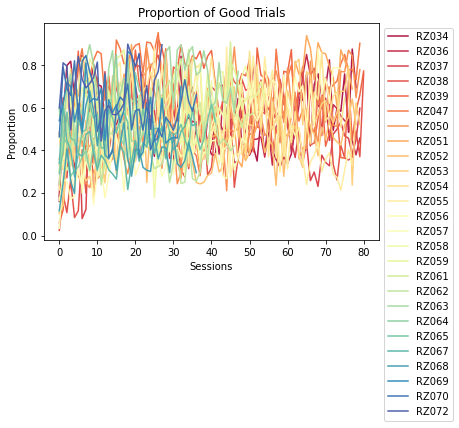

In [51]:
# plot the proportion of good trials
plot_each_mouse_per_line(data_df=trial_type_df, 
                         column_name='p_good', 
                         plot_name="%_good_trials", 
                         title='Proportion of Good Trials',
                         x_label='Sessions', 
                         y_label='Proportion')

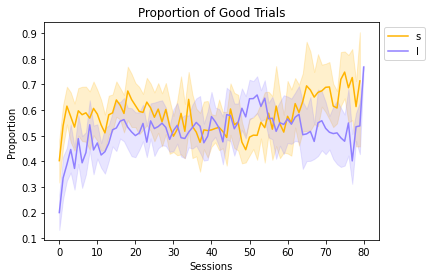

In [52]:
plot_overdays_colored_by_group(data_df=trial_type_df, 
                               column_name="p_good", 
                               plot_name='%_good_trials_by_group', 
                               title='Proportion of Good Trials', 
                               x_label='Sessions', 
                               y_label='Proportion')

### Percent missed trials

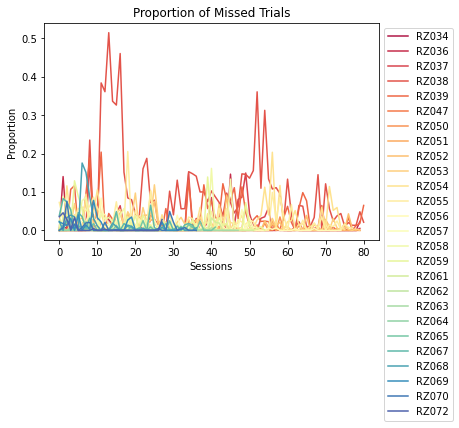

In [53]:
# plot the proportion of miss trials
plot_each_mouse_per_line(data_df=trial_type_df, 
                         column_name='p_miss', 
                         plot_name="%_miss_trials",
                         title='Proportion of Missed Trials', 
                         x_label='Sessions', 
                         y_label='Proportion')

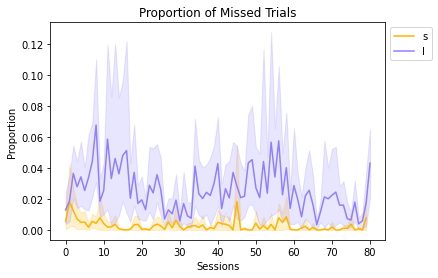

In [54]:
plot_overdays_colored_by_group(data_df=trial_type_df, 
                               column_name="p_miss", 
                               plot_name='%_miss_trials_by_group', 
                               title='Proportion of Missed Trials', 
                               x_label='Sessions', 
                               y_label='Proportion')

### Percent accident trials

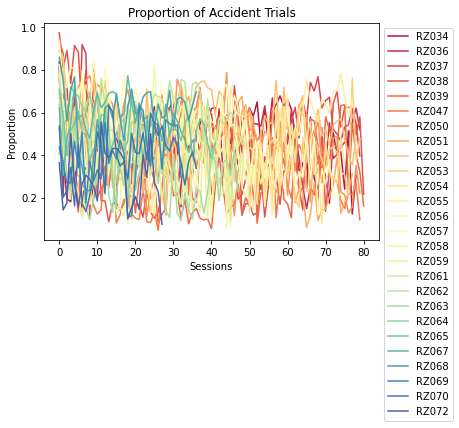

In [55]:
# plot the proportion of accident trials
plot_each_mouse_per_line(data_df=trial_type_df, 
                         column_name='p_accident', 
                         plot_name="%_accident_trials", 
                         title='Proportion of Accident Trials',
                         x_label='Sessions', 
                         y_label='Proportion')

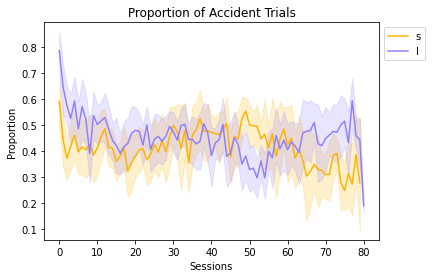

In [56]:
plot_overdays_colored_by_group(data_df=trial_type_df, 
                               column_name="p_accident", 
                               plot_name='%_accident_trials_by_group', 
                               title='Proportion of Accident Trials', 
                               x_label='Sessions', 
                               y_label='Proportion')

# Plot rewards per session

### add info to training session log for plotting

In [57]:
def generate_reward_df(sessions):

    reward_df = sessions[['mouse', 'group', 'session', 'num_trials', 
                                            'rewards', 'session_time']].copy()
    reward_df['reward_rate'] = reward_df.rewards/reward_df.session_time
    reward_df['reward_per_trial'] = reward_df.rewards/reward_df.num_trials
    reward_df['num_trials_rewarded'] = reward_df.rewards/5
    reward_df['%_trials_rewarded'] = reward_df.num_trials_rewarded/reward_df.num_trials

    return reward_df

In [58]:
rewards_df = generate_reward_df(sessions_training)

### plot % rewarded trials

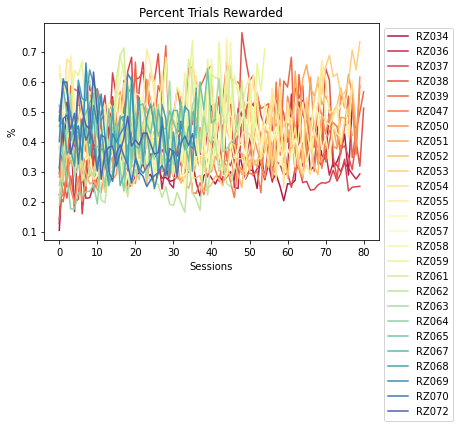

In [59]:
plot_each_mouse_per_line(data_df=rewards_df, 
                         column_name='%_trials_rewarded', 
                         plot_name="%_trials_rewarded",
                         title='Percent Trials Rewarded', 
                         x_label='Sessions', 
                         y_label='%')

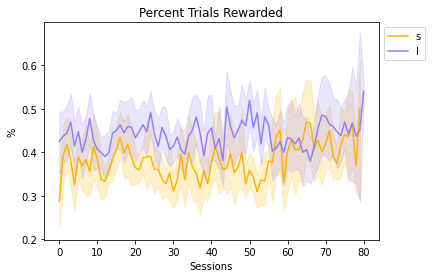

In [60]:
plot_overdays_colored_by_group(data_df=rewards_df, 
                               column_name="%_trials_rewarded", 
                               plot_name='%_trials_rewarded_by_group', 
                               title='Percent Trials Rewarded', 
                               x_label='Sessions', 
                               y_label='%')

### Plot reward rate

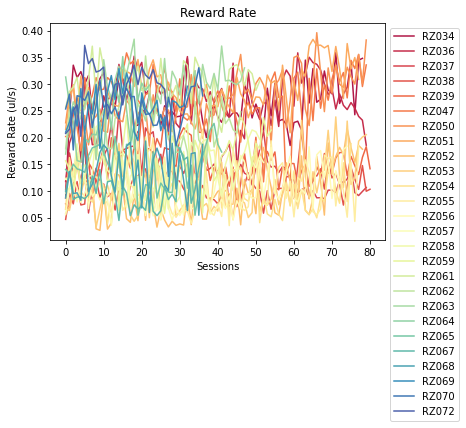

In [61]:
# plot the reward rate
plot_each_mouse_per_line(data_df=rewards_df, 
                         column_name='reward_rate', 
                         plot_name="reward_rate",
                         title='Reward Rate', 
                         x_label='Sessions', 
                         y_label='Reward Rate (ul/s)')

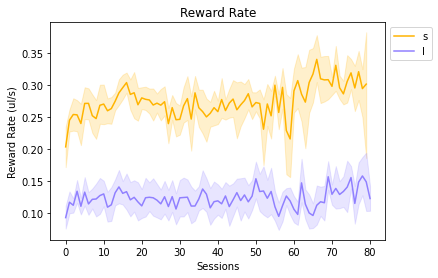

In [62]:
plot_overdays_colored_by_group(data_df=rewards_df, 
                               column_name="reward_rate", 
                               plot_name='reward_rate_by_group', 
                               title='Reward Rate', 
                               x_label='Sessions', 
                               y_label='Reward Rate (ul/s)')

### Plot session length

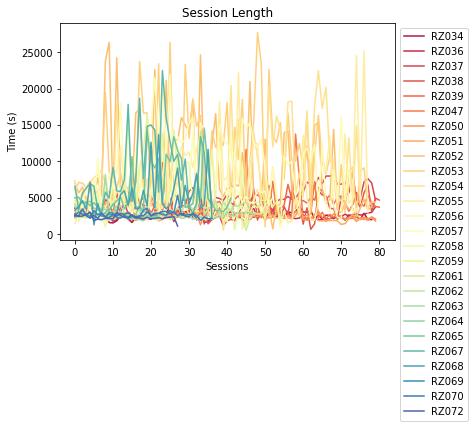

In [63]:
# plot the session length
plot_each_mouse_per_line(data_df=rewards_df, 
                         column_name='session_time', 
                         plot_name="session_length", 
                         title='Session Length',
                         x_label='Sessions', 
                         y_label='Time (s)')

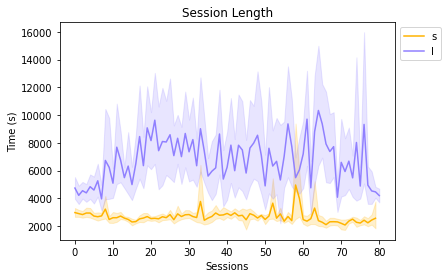

In [64]:
plot_overdays_colored_by_group(data_df=rewards_df, 
                               column_name="session_time", 
                               plot_name='session_length_by_group', 
                               title='Session Length', 
                               x_label='Sessions', 
                               y_label='Time (s)')

In [65]:
rewards_short = rewards_df[rewards_df['group']=='s'].sort_values(by='session_time')
rewards_short

,mouse,group,session,num_trials,rewards,session_time,reward_rate,reward_per_trial,num_trials_rewarded,%_trials_rewarded
1539,RZ061,s,45,55.0,180.0,534.59,0.336707,3.272727,36.0,0.654545
1371,RZ072,s,27,106.0,240.0,1128.54,0.212664,2.264151,48.0,0.452830
664,RZ050,s,33,193.0,410.0,1288.60,0.318175,2.124352,82.0,0.424870
974,RZ051,s,70,157.0,435.0,1342.92,0.323921,2.770701,87.0,0.554140
228,RZ036,s,45,82.0,195.0,1420.34,0.137291,2.378049,39.0,0.475610
...,...,...,...,...,...,...,...,...,...,...
822,RZ047,s,52,565.0,855.0,7281.22,0.117425,1.513274,171.0,0.302655
888,RZ047,s,59,420.0,770.0,7627.55,0.100950,1.833333,154.0,0.366667
1126,RZ063,s,8,438.0,1300.0,8191.27,0.158706,2.968037,260.0,0.593607
873,RZ047,s,58,720.0,1400.0,13760.99,0.101737,1.944444,280.0,0.388889


In [66]:
sessions_training.loc[(sessions_training.mouse=='RZ047') & (sessions_training.session==58)]

,Unnamed: 0.1,Unnamed: 0,mouse,date,time,exp,training,rig,pump_ul_per_turn,avg_tw,...,num_trials,rewards,session_time,trainer,record,ending_code,cohort,tw_mean,miss_trials,good_trials
873,931,931,RZ047,2024-09-20,12-44-45,2,regular,rig2,NaN,1.81,...,720.0,1400.0,13760.99,Rebekah,False,reward,cohort_6,2.131917,0.0,505.0


### plot num trials completed

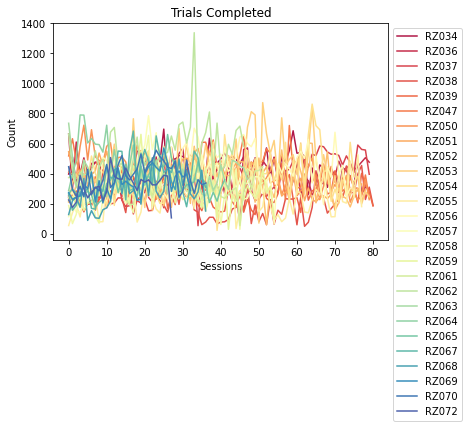

In [67]:
# plot the number of trials completed
plot_each_mouse_per_line(data_df=rewards_df, 
                         column_name='num_trials', 
                         plot_name="num_trials", 
                         title='Trials Completed',
                         x_label='Sessions', 
                         y_label='Count')

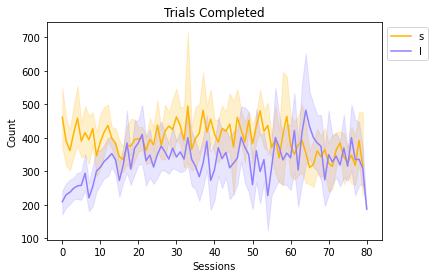

In [68]:
plot_overdays_colored_by_group(data_df=rewards_df, 
                               column_name="num_trials", 
                               plot_name='num_trials_by_group', 
                               title='Trials Completed', 
                               x_label='Sessions', 
                               y_label='Count')

# Plot background behavior

### generate mistake df for plotting

In [69]:
def get_session_mistakes(all_trials):
    all_trials['bg_repeats'] -= 1
    num_bg_repeats_mean = all_trials.bg_repeats.mean()
    num_bg_repeats_med = all_trials.bg_repeats.median()
    num_bg_repeats_std = all_trials.bg_repeats.std()
    num_bg_repeats_rate_mean = num_bg_repeats_mean/all_trials.bg_length.mean()
    return [num_bg_repeats_mean, num_bg_repeats_med, num_bg_repeats_std, num_bg_repeats_rate_mean]

In [70]:
def generate_mistake_df(training_session_log):
    mistake_df = training_session_log[['mouse', 'session', 'dir', 'group']].copy()

    for _, session_info in training_session_log.iterrows():
        all_trials = utils_c5v2.load_data(utils_c5v2.generate_trials_analyzed_path(data_folder, session_info))
        # time waited for all trials
        session_mistakes = get_session_mistakes(all_trials)
        mistake_df.loc[mistake_df.dir == session_info['dir'], 
                                ['num_bg_repeats_mean', 'num_bg_repeats_med', 
                                 'num_bg_repeats_std', 'num_bg_repeats_rate_mean']] = session_mistakes
    return mistake_df

In [71]:
mistakes_df = generate_mistake_df(sessions_training)

In [72]:
len(sessions_training)

1571

In [73]:
sessions_training.head()

,Unnamed: 0.1,Unnamed: 0,mouse,date,time,exp,training,rig,pump_ul_per_turn,avg_tw,...,num_trials,rewards,session_time,trainer,record,ending_code,cohort,tw_mean,miss_trials,good_trials
0,0,0,RZ034,2024-01-30,09-52-34,2,regular,rig2,0.0680,0.47,...,397.0,210.0,2406.21,NaN,NaN,NaN,cohort_5,0.466963,0.0,64.0
1,1,1,RZ036,2024-01-30,09-55-23,2,regular,rig3,0.0609,0.39,...,664.0,425.0,3601.08,NaN,NaN,NaN,cohort_5,0.390074,0.0,123.0
2,2,2,RZ037,2024-01-30,10-36-04,2,regular,rig2,0.0680,1.70,...,252.0,370.0,3602.47,NaN,NaN,NaN,cohort_5,1.696422,0.0,60.0
3,3,3,RZ038,2024-01-30,10-59-43,2,regular,rig3,0.0609,0.75,...,239.0,170.0,3607.86,NaN,NaN,NaN,cohort_5,0.753882,0.0,6.0
4,4,4,RZ039,2024-01-30,11-40-20,2,regular,rig2,0.0680,1.18,...,245.0,275.0,3610.04,NaN,NaN,NaN,cohort_5,1.179677,0.0,15.0


### plot number of mistakes per trial

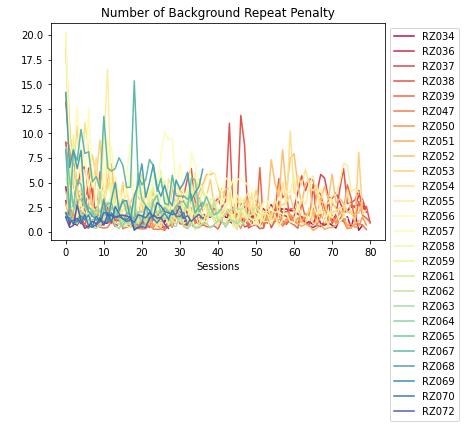

In [74]:
plot_each_mouse_per_line(data_df=mistakes_df, 
                         column_name='num_bg_repeats_mean', 
                         plot_name="num_bg_repeats_mean", 
                         title='Number of Background Repeat Penalty',
                         x_label='Sessions', 
                         y_label=' ')

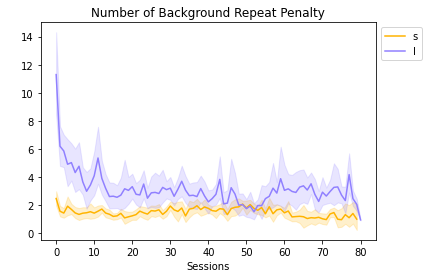

In [75]:
plot_overdays_colored_by_group(data_df=mistakes_df, 
                               column_name="num_bg_repeats_mean", 
                               plot_name='num_bg_repeats_mean_by_group', 
                               title='Number of Background Repeat Penalty', 
                               x_label='Sessions', 
                               y_label=' ')

### plot mistake rate

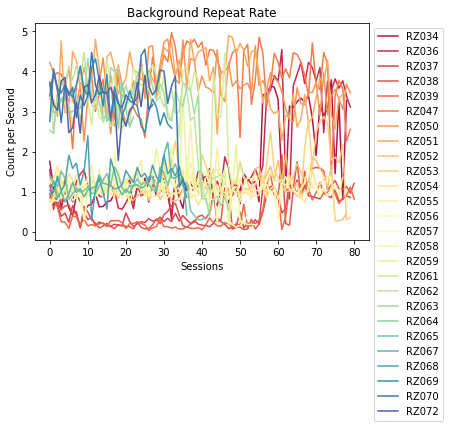

In [76]:
plot_each_mouse_per_line(data_df=mistakes_df, 
                         column_name='num_bg_repeats_rate_mean', 
                         plot_name="num_bg_repeats_rate_mean", 
                         title='Background Repeat Rate',
                         x_label='Sessions', 
                         y_label='Count per Second')

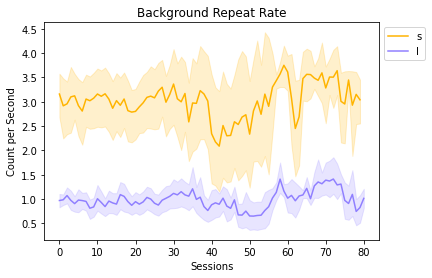

In [77]:
plot_overdays_colored_by_group(data_df=mistakes_df, 
                               column_name="num_bg_repeats_rate_mean", 
                               plot_name='num_bg_repeats_rate_mean_by_group', 
                               title='Background Repeat Rate', 
                               x_label='Sessions', 
                               y_label='Count per Second')

# Plot time wait behavior

### generate wait df for plotting

In [78]:
def generate_wait_df(training_session_log):
    wait_df = training_session_log[['mouse', 'session', 'dir', 'group', 'cohort']].copy()

    for _, session_info in training_session_log.iterrows():
        all_trials = utils_c5v2.load_data(utils_c5v2.generate_trials_analyzed_path(data_folder, session_info))
        # time waited for all trials
        session_tw = helper.get_session_tw(all_trials)
        wait_df.loc[wait_df.dir == session_info['dir'], 
                                ['tw_mean', 'tw_median', 'tw_stdev']] = session_tw

        good_trials = utils.select_good_trials(all_trials)
         # time waited for good trials
        session_tw_g = helper.get_session_tw(good_trials)
        wait_df.loc[wait_df.dir == session_info['dir'], 
                                ['tw_mean_g', 'tw_median_g', 'tw_stdev_g']] = session_tw_g
    return wait_df

In [79]:
wait_df = generate_wait_df(sessions_training)
wait_df_c5 = wait_df.loc[wait_df.cohort=='cohort_5']
wait_df_c6 = wait_df.loc[wait_df.cohort=='cohort_6']
wait_df_c7 = wait_df.loc[wait_df.cohort=='cohort_7']

### plot time watied

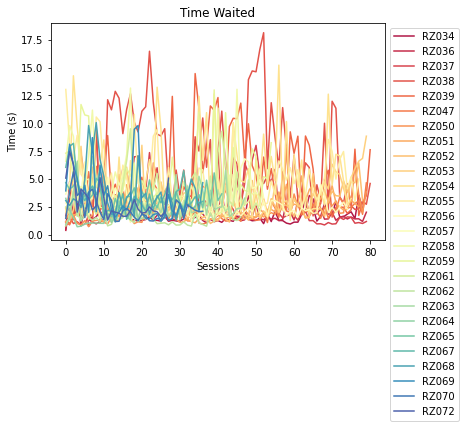

In [80]:
# plot the time waited over days. 
plot_each_mouse_per_line(data_df=wait_df, column_name='tw_mean', plot_name="tw_mean", title='Time Waited', x_label='Sessions', y_label='Time (s)')

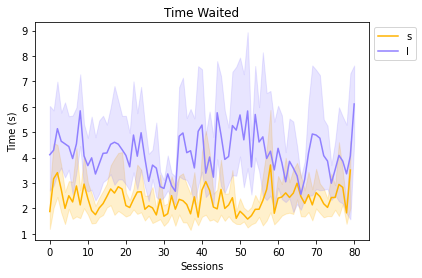

In [81]:
plot_overdays_colored_by_group(data_df=wait_df, column_name="tw_mean", plot_name='tw_mean_by_group_all', title='Time Waited', x_label='Sessions', y_label='Time (s)')

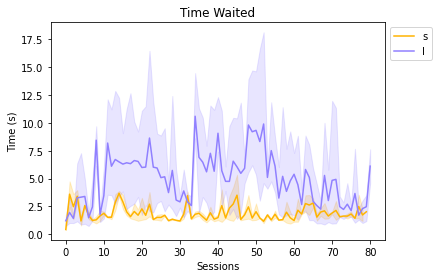

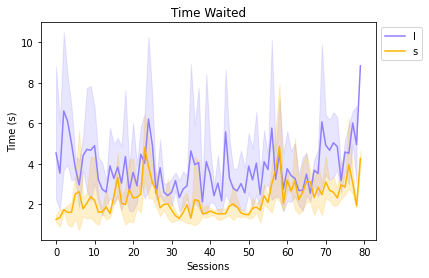

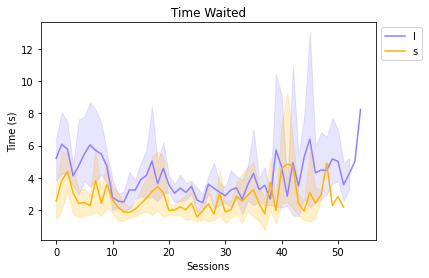

In [82]:
plot_overdays_colored_by_group(data_df=wait_df_c5, column_name="tw_mean", plot_name='tw_mean_by_group_c5', title='Time Waited', x_label='Sessions', y_label='Time (s)')
plot_overdays_colored_by_group(data_df=wait_df_c6, column_name="tw_mean", plot_name='tw_mean_by_group_c6', title='Time Waited', x_label='Sessions', y_label='Time (s)')
plot_overdays_colored_by_group(data_df=wait_df_c7, column_name="tw_mean", plot_name='tw_mean_by_group_c7', title='Time Waited', x_label='Sessions', y_label='Time (s)')

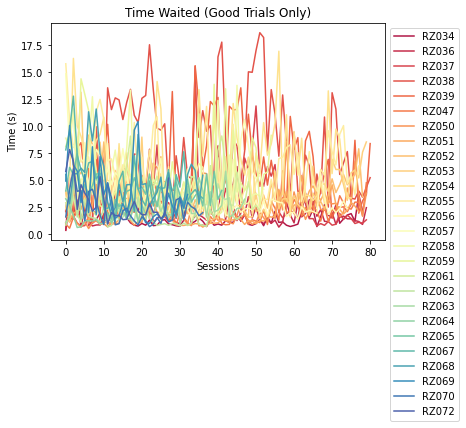

In [83]:
# plot the time waited over days good trials only. 
plot_each_mouse_per_line(data_df=wait_df, 
                         column_name='tw_mean_g', 
                         plot_name="tw_mean_g", 
                         title='Time Waited (Good Trials Only)',
                         x_label='Sessions', 
                         y_label='Time (s)')

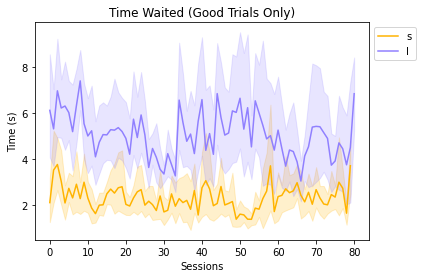

In [84]:
plot_overdays_colored_by_group(data_df=wait_df, 
                               column_name="tw_mean_g", 
                               plot_name='tw_mean_g_by_group', 
                               title='Time Waited (Good Trials Only)', 
                               x_label='Sessions', 
                               y_label='Time (s)')

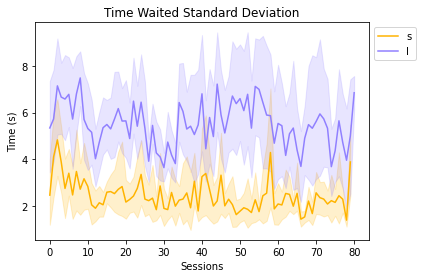

In [85]:
plot_overdays_colored_by_group(data_df=wait_df, 
                               column_name="tw_stdev", 
                               plot_name='tw_stdev_by_group', 
                               title='Time Waited Standard Deviation', 
                               x_label='Sessions', 
                               y_label='Time (s)')

In [86]:
wait_df[(wait_df['session']>80) & (wait_df['group']=='l')].sort_values('tw_mean')

,mouse,session,dir,group,cohort,tw_mean,tw_median,tw_stdev,tw_mean_g,tw_median_g,tw_stdev_g


### between group t_test

In [87]:
def plot_tw_box(data_df, figure_name, figure_title):
    plt.figure(figsize=(1.5, 6))
    sns.boxplot(data=wait_df, x="group", y="tw_mean", palette=custom_palette)
    plt.title(figure_title)
    plt.ylabel("Time (s)")
    plt.xlabel("Group")
    plt.savefig(f'{figure_folder}/{figure_name}.png', bbox_inches='tight')

    short = data_df[data_df['group']=='s']
    long = data_df[data_df['group']=='l']

    print(f'{len(short.mouse.unique())+len(long.mouse.unique())} mice total')
    print(f'{len(short.mouse.unique())} short mice, {len(long.mouse.unique())} long mice')
    print(short.tw_mean.mean())
    print(long.tw_mean.mean())
    print("diff:", long.tw_mean.mean()-short.tw_mean.mean())
    ttest = stats.ttest_ind(short['tw_mean'], long['tw_mean'])
    p_val_t = ttest[1]
    print(p_val_t)

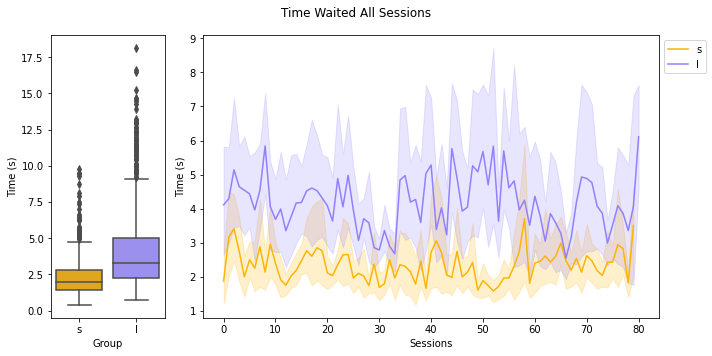

In [88]:
def plot_tw_subplots(data_df, column_name, plot_name, title, x_label, y_label, 
                     figure_folder, color_palette, ylim=None):
    """
    Plots two subplots: 
        1. Box plot of 'column_name' by group.
        2. Line plot of 'column_name' over sessions, colored by group.
    """
    fig, axes = plt.subplots(1, 2, figsize=(10, 5), gridspec_kw={'width_ratios': [1, 4]})  # Adjust subplot widths

    # Box plot (left)
    sns.boxplot(data=data_df, x="group", y=column_name, palette=color_palette, ax=axes[0])
    axes[0].set_ylabel(y_label)
    axes[0].set_xlabel("Group")

    # Line plot (right)
    sns.lineplot(x="session",
                 y=column_name,
                 hue="group",
                 data=data_df,
                 palette=color_palette,
                 ax=axes[1])
    axes[1].set_xlabel(x_label)
    axes[1].set_ylabel(y_label)
    if ylim:
        axes[1].set_ylim(ylim)
    axes[1].legend(bbox_to_anchor=(1, 1), loc="upper left")
    plt.suptitle(title)
    plt.tight_layout()
    
    fig.savefig(f'{figure_folder}/{plot_name}.png', bbox_inches='tight')

# Example usage:
plot_tw_subplots(data_df=wait_df, column_name="tw_mean", 
                 plot_name='tw_subplots', title='Time Waited All Sessions', 
                 x_label='Sessions', y_label='Time (s)', 
                 figure_folder=figure_folder, 
                 color_palette=custom_palette)

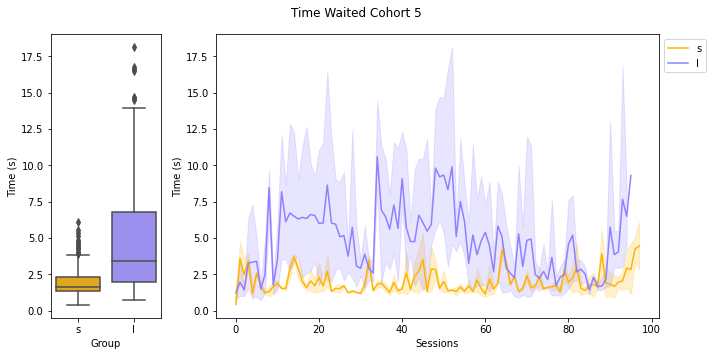

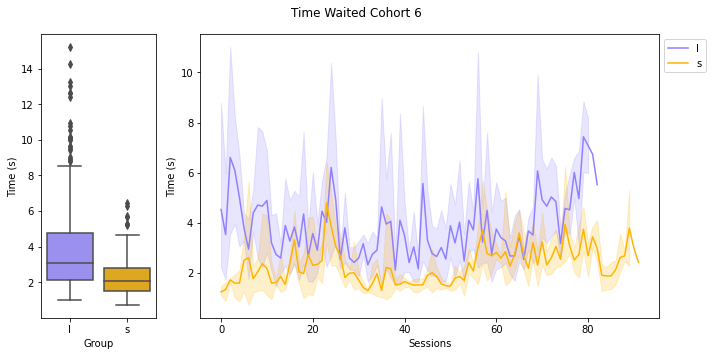

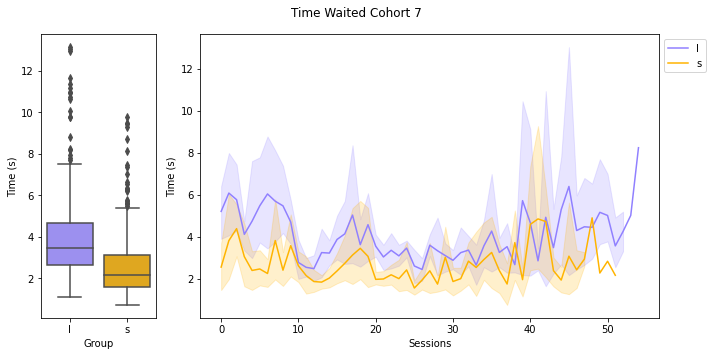

In [97]:
plot_tw_subplots(data_df=wait_df_c5, column_name="tw_mean", 
                 plot_name='tw_subplots_c5', title='Time Waited Cohort 5', 
                 x_label='Sessions', y_label='Time (s)', 
                 figure_folder=figure_folder, 
                 color_palette=custom_palette)
plot_tw_subplots(data_df=wait_df_c6, column_name="tw_mean", 
                 plot_name='tw_subplots_c6', title='Time Waited Cohort 6', 
                 x_label='Sessions', y_label='Time (s)', 
                 figure_folder=figure_folder, 
                 color_palette=custom_palette)
plot_tw_subplots(data_df=wait_df_c7, column_name="tw_mean", 
                 plot_name='tw_subplots_c7', title='Time Waited Cohort 7', 
                 x_label='Sessions', y_label='Time (s)', 
                 figure_folder=figure_folder, 
                 color_palette=custom_palette)

26 mice total
12 short mice, 14 long mice
2.3414784499276564
4.168674823655279
diff: 1.827196373727623
2.3923087772361564e-50


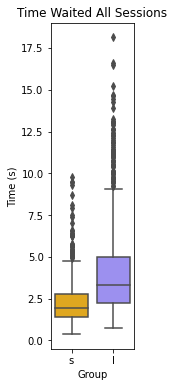

In [89]:
plot_tw_box(wait_df, 'tw_box_all', "Time Waited All Sessions")

5 mice total
2 short mice, 3 long mice
1.8881258857853034
5.028003858712725
diff: 3.1398779729274215
1.3785515362633553e-22
8 mice total
3 short mice, 5 long mice
2.2828228091292955
3.749083721305169
diff: 1.4662609121758736
4.927968587345195e-18
13 mice total
7 short mice, 6 long mice
2.6625347939897606
4.005065117959414
diff: 1.3425303239696533
1.180108323629497e-14


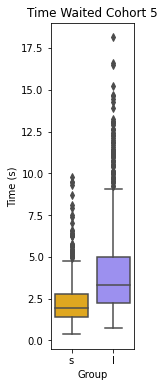

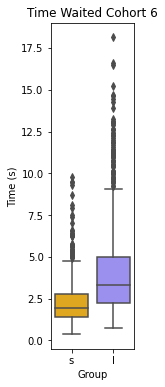

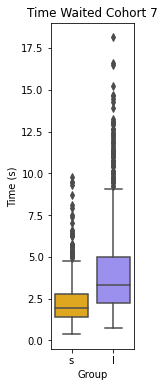

In [90]:
plot_tw_box(wait_df_c5, 'tw_box_c5', "Time Waited Cohort 5")
plot_tw_box(wait_df_c6, 'tw_box_c6', "Time Waited Cohort 6")
plot_tw_box(wait_df_c7, 'tw_box_c7', "Time Waited Cohort 7")

by days sessions tw difference

In [91]:
def generate_p_val_df(wait_df, group_col_name):
    """
    Generates a DataFrame with p-values and significance stars for t-tests 
    between two groups within each category.
    """
    result_list = []
    for num, data in wait_df.groupby(group_col_name):
        short = data[data['group']=='s']
        long = data[data['group']=='l']
        s_tw = short.tw_mean.mean()
        l_tw = long.tw_mean.mean()

        # Perform t-test
        ttest = stats.ttest_ind(short['tw_mean'], long['tw_mean'])
        p_val_t = ttest[1]

        # Determine significance stars
        stars = ""
        if p_val_t < 0.05:
            stars += "*"
        if p_val_t < 0.01:
            stars += "*"
        if p_val_t < 0.001:
            stars += "*"
        if p_val_t < 0.0001:
            stars += "*"

        result_list.append([num, s_tw, l_tw, p_val_t, stars])

    return pd.DataFrame(result_list, columns=["period", "s_tw", "l_tw", "p_val_t", "sig"])


plot waiting df in 10 day intervals

In [92]:
wait_df['period'] = wait_df['session']//10 #add session period in 10 day intervals

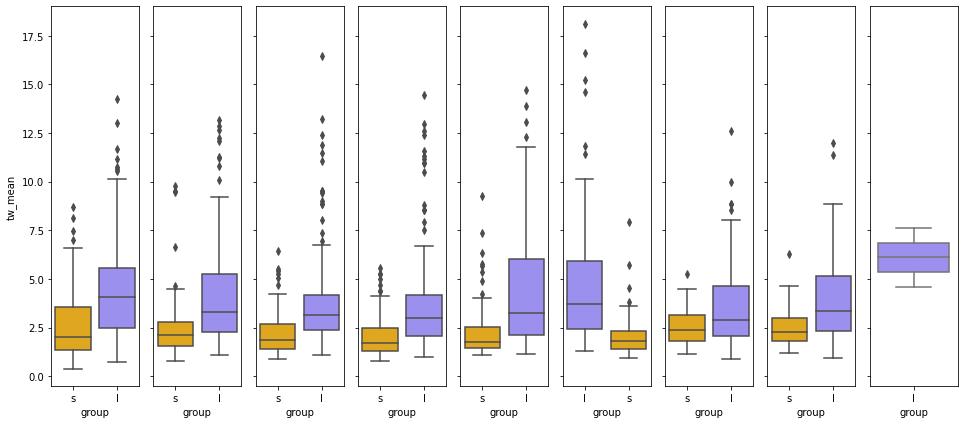

In [93]:
num_subplots = wait_df['period'].max()+1
fig, axs = plt.subplots(1, num_subplots, figsize=(num_subplots*1.5, 6), sharey=True)
for p, period_data in wait_df.groupby('period'):
    sns.boxplot(data=period_data,
                x="group", 
                y="tw_mean", 
                palette=custom_palette,
                ax=axs.flat[p])
    if p != 0:
        axs.flat[p].set_ylabel("")

plt.tight_layout()
plt.savefig(f'{figure_folder}/tw_box_by_period.png', bbox_inches='tight')

In [ ]:
tw_stats_by_period = generate_p_val_df(wait_df, "period")
tw_stats_by_period['diff'] = tw_stats_by_period.l_tw - tw_stats_by_period.s_tw
tw_stats_by_period[tw_stats_by_period['p_val_t'] < 0.05]

### example session plot

In [ ]:
sessions_training.loc[sessions_training.session == 28]

In [ ]:
long_info = sessions_training.loc[sessions_training.dir=="2024-03-05_12-22-43_RZ039"].iloc[0]
trials_long = utils_c5v2.load_data(utils_c5v2.generate_trials_analyzed_path(data_folder, long_info))

short_info = sessions_training.loc[sessions_training.dir=="2024-07-31_10-44-41_RZ051"].iloc[0]
trials_short = utils_c5v2.load_data(utils_c5v2.generate_trials_analyzed_path(data_folder, short_info))

In [ ]:
trials_examples = pd.concat([trials_long, trials_short])

In [ ]:
trials_examples

In [ ]:
sns.scatterplot(x="session_trial_num",
                y="time_waited",
                hue="group",
                data=trials_examples,
                palette=custom_palette,
                s=20)
plt.axhline(y=trials_examples.loc[trials_examples.group == 's']['time_waited'].mean(), 
               color=custom_palette['s'], linestyle='--')
plt.axhline(y=trials_examples.loc[trials_examples.group == 'l']['time_waited'].mean(), 
               color=custom_palette['l'], linestyle='--')
plt.savefig(f'{figure_folder}/example_sessions_scatter.png')

In [ ]:
sns.kdeplot(data=trials_examples.reset_index(drop=True), 
                    x="time_waited", 
                    hue="group",
                    common_norm=False,
                    bw_adjust=0.5, 
                    palette=custom_palette)
plt.axvline(x=trials_examples.loc[trials_examples.group == 's']['time_waited'].mean(), 
               color=custom_palette['s'], linestyle='--')
plt.axvline(x=trials_examples.loc[trials_examples.group == 'l']['time_waited'].mean(), 
               color=custom_palette['l'], linestyle='--')
plt.savefig(f'{figure_folder}/example_sessions_kde.png')

In [ ]:
sns.ecdfplot(data=trials_examples.reset_index(drop=True), 
                    x="time_waited", 
                    hue="group",
                    palette=custom_palette)
plt.axvline(x=trials_examples.loc[trials_examples.group == 's']['time_waited'].mean(), 
               color=custom_palette['s'], linestyle='--')
plt.axvline(x=trials_examples.loc[trials_examples.group == 'l']['time_waited'].mean(), 
               color=custom_palette['l'], linestyle='--')
plt.savefig(f'{figure_folder}/example_sessions_ecdf.png')

In [ ]:
sessions_training.loc[sessions_training.session == 36]

In [ ]:
long_info = sessions_training.loc[sessions_training.dir=="2024-08-13_14-19-06_RZ054"].iloc[0]
trials_long = utils_c5v2.load_data(utils_c5v2.generate_trials_analyzed_path(data_folder, long_info))

short_info = sessions_training.loc[sessions_training.dir=="2024-08-13_10-45-33_RZ047"].iloc[0]
trials_short = utils_c5v2.load_data(utils_c5v2.generate_trials_analyzed_path(data_folder, short_info))

trials_examples = pd.concat([trials_long, trials_short])

In [ ]:
sns.scatterplot(x="session_trial_num",
                y="time_waited",
                hue="group",
                data=trials_examples,
                palette=custom_palette,
                s=20)
plt.axhline(y=trials_examples.loc[trials_examples.group == 's']['time_waited'].mean(), 
               color=custom_palette['s'], linestyle='--')
plt.axhline(y=trials_examples.loc[trials_examples.group == 'l']['time_waited'].mean(), 
               color=custom_palette['l'], linestyle='--')
plt.savefig(f'{figure_folder}/example_sessions_scatter_2.png')

In [ ]:
sns.kdeplot(data=trials_examples.reset_index(drop=True), 
                    x="time_waited", 
                    hue="group",
                    common_norm=False,
                    bw_adjust=0.5, 
                    palette=custom_palette)
plt.axvline(x=trials_examples.loc[trials_examples.group == 's']['time_waited'].mean(), 
               color=custom_palette['s'], linestyle='--')
plt.axvline(x=trials_examples.loc[trials_examples.group == 'l']['time_waited'].mean(), 
               color=custom_palette['l'], linestyle='--')
plt.savefig(f'{figure_folder}/example_sessions_kde_2.png')

In [ ]:
sns.ecdfplot(data=trials_examples.reset_index(drop=True), 
                    x="time_waited", 
                    hue="group",
                    palette=custom_palette)
plt.axvline(x=trials_examples.loc[trials_examples.group == 's']['time_waited'].mean(), 
               color=custom_palette['s'], linestyle='--')
plt.axvline(x=trials_examples.loc[trials_examples.group == 'l']['time_waited'].mean(), 
               color=custom_palette['l'], linestyle='--')
plt.savefig(f'{figure_folder}/example_sessions_ecdf_2.png')

## plots to be figured out

In [ ]:
for group, mice in cohort_group.items():
    fig, axs = plt.subplots(5, 1, figsize=(10, 10), sharex=True)
    for i, mouse in enumerate(mice):
        session_mouse = wait_df.loc[(wait_df.mouse == mouse) & (wait_df.group == group)]
        ax = axs.flat[i]
        ax.errorbar(session_mouse.session, session_mouse.tw_mean, session_mouse.tw_stdev, 
                    linestyle='None', marker='o', color=custom_palette[group], label='mean')
        ax.scatter(session_mouse.session, session_mouse.tw_median, label='median', color='yellowgreen')
        ax.set_title(mouse)
        ax.set_xlabel('Sessions')
        ax.set_ylabel('Time Waited (s)')
        ax.set_ylim([-5, 35])
    
    if group == "s":
        axs.flat[3].axis('off')
        axs.flat[4].axis('off')
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.12, 1))
    plt.tight_layout()
    plt.savefig(f'{figure_folder}/tw_plots_{group}.png', bbox_inches='tight', dpi=300)

In [ ]:
for group, mice in cohort_group.items():
    fig, axs = plt.subplots(3, 1, figsize=(10, 10), sharex=True, sharey=True)
    for i, mouse in enumerate(mice):
        session_mouse = wait_df.loc[(wait_df.mouse == mouse) & (wait_df.group == group)]
        ax = axs.flat[i]
        ax.errorbar(session_mouse.session, session_mouse.tw_mean_g, session_mouse.tw_stdev_g, 
                    linestyle='None', marker='o', color=custom_palette[group], label='mean')
        ax.scatter(session_mouse.session, session_mouse.tw_median_g, label='median', color='yellowgreen')
        ax.set_title(mouse)
        ax.set_xlabel('Sessions')
        ax.set_ylabel('Time Waited (s)')
        ax.set_ylim([-5, 35])
    
    if group == "s":
        axs.flat[2].axis('off')
        # axs.set_ylim(0, 35)
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.12, 1))
    plt.tight_layout()
    plt.savefig(f'{figure_folder}/tw_good_plots_{group}.png', bbox_inches='tight', dpi=300)

In [ ]:
def calculate_subplot_row_col(session_mouse, plots_per_row):
    days_trained = len(session_mouse)
    num_rows = (days_trained - 1) // plots_per_row + 1
    num_cols = min(days_trained, plots_per_row)
    return num_rows, num_cols

In [ ]:
for mouse in mouse_list:
    session_mouse = sessions_training.loc[sessions_training.mouse == mouse]
    num_rows, num_cols = calculate_subplot_row_col(session_mouse, 8)
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(21.5, 2.5 * num_rows))

    for i, (_, session_info) in enumerate(session_mouse.iterrows()):
        all_trials = utils_c5.load_data(utils_c5.generate_trials_analyzed_path(data_folder, session_info))
        row_idx = i // num_cols
        col_idx = i % num_cols
        ax = axs[row_idx, col_idx]
        
        sns.scatterplot(x="session_trial_num",
                        y="time_waited",
                        hue="group",
                        data=all_trials,
                        palette=custom_palette,
                        ax=axs.flat[i])
        ax.set_ylim([0,35])
        ax.set_title(f'Session {i}')
        ax.legend().remove()
    
    # Remove any unused subplots
    if i + 1 < num_rows * num_cols:
        for j in range(i + 1, num_rows * num_cols):
            axs.flat[j].axis('off')

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Save the figure with proper spacing around the subplots
    plt.savefig(f'{figure_folder}/trial_num_vs_tw_{mouse}.png', bbox_inches='tight', dpi=300)
    plt.close()

# Stitched all sessions all mice per day

In [ ]:
stitched_folder = os.path.join(data_dir, cohort, exp, 'stitched')
stitched_figure_folder = os.path.join(data_dir, cohort, exp, 'figures')
print(data_folder)
print(figure_folder)

In [ ]:
stitched_log = utils.load_session_log(stitched_folder, f'sessions_training_stitched_{exp}.csv')

In [ ]:
def generate_events_processed_stitched_path(data_folder, session_info):
    filename = f'events_processed_stitched_{session_info.date}.csv'
    return os.path.join(data_folder, f"{session_info.date}", filename)

In [ ]:
def generate_trials_analyzed_stitched_path(data_folder, session_info):
    filename = f'trials_analyzed_stitched_{session_info.date}.csv'
    return os.path.join(data_folder, session_info.date, filename)

In [ ]:
days_trained = len(stitched_log)
num_rows = (days_trained - 1) // 10 + 1
num_cols = min(days_trained, 10)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(2.5*num_cols, 2.5 * num_rows))

for i, (_, session_info) in enumerate(stitched_log.iterrows()):
    all_trials = utils_c5.load_data(generate_trials_analyzed_stitched_path(stitched_folder, session_info))
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axs[row_idx, col_idx]

    sns.kdeplot(data=all_trials.reset_index(drop=True), 
                    x="time_waited", 
                    hue="group",
                    common_norm=False,
                    bw_adjust=0.5, 
                    palette=custom_palette,
                    ax=axs.flat[i])
    
    ax.axvline(x=all_trials.loc[all_trials.group == 'l']['time_waited'].mean(), 
               color=custom_palette['l'], linestyle='--')
    ax.axvline(x=all_trials.loc[all_trials.group == 's']['time_waited'].mean(), 
               color=custom_palette['s'], linestyle='--')
    ax.set_xlim([0, 15])
    ax.set_ylim([0, 0.6])
    ax.set_title(f'Session {i+1}')
    
# Remove any unused subplots
if i + 1 < num_rows * num_cols:
    for j in range(i + 1, num_rows * num_cols):
        axs.flat[j].axis('off')

for i in range(days_trained):
    ax = axs.flat[i]
    ax.get_legend().remove()

# Adjust the spacing between subplots
plt.tight_layout()

# Save the figure with proper spacing around the subplots
plt.savefig(f'{stitched_figure_folder}/tw_kde.png', bbox_inches='tight', dpi=300)

In [ ]:
days_trained = len(stitched_log)
num_rows = (days_trained - 1) // 10 + 1
num_cols = min(days_trained, 10)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(2.5*num_cols, 2.5 * num_rows))

for i, (_, session_info) in enumerate(stitched_log.iterrows()):
    all_trials = utils_c5.load_data(generate_trials_analyzed_stitched_path(stitched_folder, session_info))
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axs[row_idx, col_idx]

    sns.ecdfplot(data=all_trials.reset_index(drop=True), 
                    x="time_waited", 
                    hue="group",
                    palette=custom_palette,
                    ax=axs.flat[i])
    
    ax.axvline(x=all_trials.loc[all_trials.group == 'l']['time_waited'].mean(), 
               color=custom_palette['l'], linestyle='--')
    ax.axvline(x=all_trials.loc[all_trials.group == 's']['time_waited'].mean(), 
               color=custom_palette['s'], linestyle='--')
    
    ax.set_xlim([0, 15])
    ax.set_ylim([0, 1.01])
    
    ax.set_title(f'Session {i+1}')
    
# Remove any unused subplots
if i + 1 < num_rows * num_cols:
    for j in range(i + 1, num_rows * num_cols):
        axs.flat[j].axis('off')

for i in range(days_trained):
    ax = axs.flat[i]
    ax.get_legend().remove()

# Adjust the spacing between subplots
plt.tight_layout()

# Save the figure with proper spacing around the subplots
plt.savefig(f'{stitched_figure_folder}/tw_cdf.png', bbox_inches='tight', dpi=300)

In [ ]:
def select_non_accident_trials(all_trials):
    non_accident_trials = all_trials[all_trials['time_waited'] > 0.5]
    return non_accident_trials

In [ ]:
days_trained = len(stitched_log)
num_rows = (days_trained - 1) // 10 + 1
num_cols = min(days_trained, 10)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(2.5*num_cols, 2.5 * num_rows))

for i, (_, session_info) in enumerate(stitched_log.iterrows()):
    all_trials = utils_c5.load_data(generate_trials_analyzed_stitched_path(stitched_folder, session_info))
    non_accident_trials = select_non_accident_trials(all_trials)
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axs[row_idx, col_idx]

    sns.kdeplot(data=non_accident_trials.reset_index(drop=True), 
                    x="time_waited", 
                    hue="group",
                    common_norm=False,
                    bw_adjust=0.5, 
                    palette=custom_palette,
                    ax=axs.flat[i])
    
    ax.axvline(x=non_accident_trials.loc[non_accident_trials.group == 'l']['time_waited'].mean(), 
               color=custom_palette['l'], linestyle='--')
    ax.axvline(x=non_accident_trials.loc[non_accident_trials.group == 's']['time_waited'].mean(), 
               color=custom_palette['s'], linestyle='--')
    
    ax.set_xlim([0, 15])
    ax.set_ylim([0, 0.6])
    
    ax.set_title(f'Session {i+1}')

# Remove any unused subplots
if i + 1 < num_rows * num_cols:
    for j in range(i + 1, num_rows * num_cols):
        axs.flat[j].axis('off')

for i in range(days_trained):
    ax = axs.flat[i]
    ax.get_legend().remove()

# Adjust the spacing between subplots
plt.tight_layout()

# Save the figure with proper spacing around the subplots
plt.savefig(f'{stitched_figure_folder}/tw_g_kde.png', bbox_inches='tight', dpi=300)

In [ ]:
days_trained = len(stitched_log)
num_rows = (days_trained - 1) // 10 + 1
num_cols = min(days_trained, 10)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(2.5*num_cols, 2.5 * num_rows))

for i, (_, session_info) in enumerate(stitched_log.iterrows()):
    all_trials = utils_c5.load_data(generate_trials_analyzed_stitched_path(stitched_folder, session_info))
    non_accident_trials = select_non_accident_trials(all_trials)
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axs[row_idx, col_idx]

    sns.ecdfplot(data=non_accident_trials.reset_index(drop=True), 
                    x="time_waited", 
                    hue="group",
                    palette=custom_palette,
                    ax=axs.flat[i])
    
    ax.axvline(x=non_accident_trials.loc[non_accident_trials.group == 'l']['time_waited'].mean(), 
               color=custom_palette['l'], linestyle='--')
    ax.axvline(x=non_accident_trials.loc[non_accident_trials.group == 's']['time_waited'].mean(), 
               color=custom_palette['s'], linestyle='--')
    
    ax.set_xlim([0, 15])
    ax.set_ylim([0, 1.01])
    
    ax.set_title(f'Session {i+1}')

# Remove any unused subplots
if i + 1 < num_rows * num_cols:
    for j in range(i + 1, num_rows * num_cols):
        axs.flat[j].axis('off')

for i in range(days_trained):
    ax = axs.flat[i]
    ax.get_legend().remove()

# Adjust the spacing between subplots
plt.tight_layout()

# Save the figure with proper spacing around the subplots
plt.savefig(f'{stitched_figure_folder}/tw_g_cdf.png', bbox_inches='tight', dpi=300)